# Hollywood Movies Data Visualization
The data set is on Hollywood movies that were released between 2007 to 2011.

The goal of this project is to explore the success of Movies.

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
hollywood_movies = pd.read_csv("hollywood_movies.csv")
print(hollywood_movies.head())
hollywood_movies = hollywood_movies.drop("exclude", axis=1)

   Year  exclude                                         Film  Lead Studio  \
0  2011      NaN                                      Average          NaN   
1  2011      NaN                             The Tree Of Life  Independant   
2  2011      NaN                            Midnight in Paris         Sony   
3  2011      NaN  Harry Potter and the Deathly Hallows Part 2  Warner Bros   
4  2011      NaN                      Twilight: Breaking Dawn  Independant   

   Critic Rating  Audience Rating      Story    Genre  \
0          52.84            61.42        NaN      NaN   
1          84.00            61.00  Discovery    Drama   
2          93.00            84.00       Love  Romance   
3          96.00            92.00    Rivalry  Fantasy   
4          26.00            68.00       Love  Romance   

   Opening Weekend Theaters  Opening Weekend per Cinema  Domestic Gross  \
0                   2810.31                     8764.92           61.33   
1                      4.00           

# Scatter Plots - Profitability And Audience Ratings

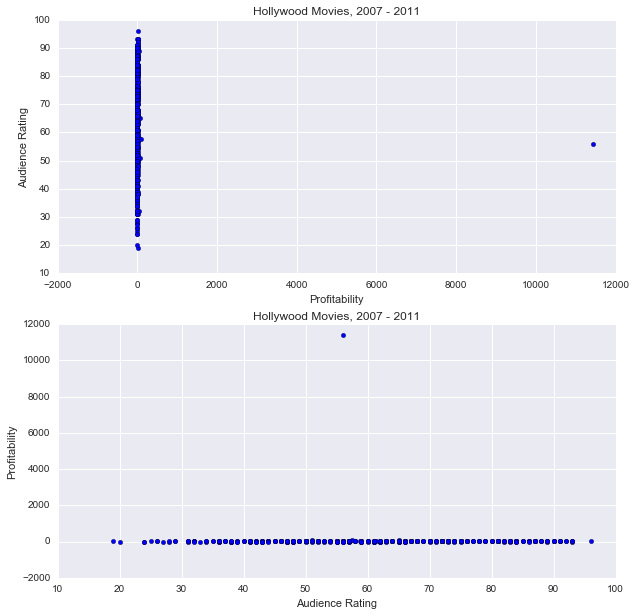

In [6]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(hollywood_movies["Profitability"], hollywood_movies["Audience Rating"])
ax1.set_ylabel("Audience Rating")
ax1.set_xlabel("Profitability")
ax1.set_title("Hollywood Movies, 2007 - 2011")
ax2.scatter(hollywood_movies["Audience Rating"], hollywood_movies["Profitability"])
ax2.set_ylabel("Profitability")
ax2.set_xlabel("Audience Rating")
ax2.set_title("Hollywood Movies, 2007 - 2011")
plt.show()

### The outlier data point correspond to Paranormal Activity, he most profitable movie ever. The movie brought 193.4 million dollars in revenue with a budget of only 15,000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1177241d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117289c50>]], dtype=object)

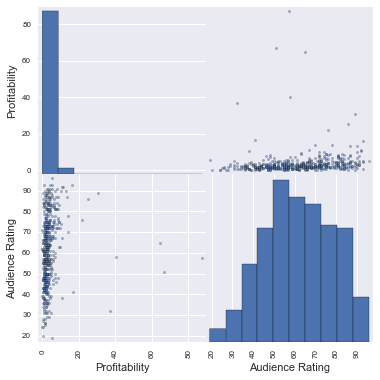

In [8]:
from pandas.tools.plotting import scatter_matrix
normal_movies = hollywood_movies[hollywood_movies["Film"] != "Paranormal Activity"]
scatter_matrix(normal_movies[["Profitability", "Audience Rating"]], figsize=(6,6))

# Box Plot - Audience And Critic Ratings : Understand the Distribution

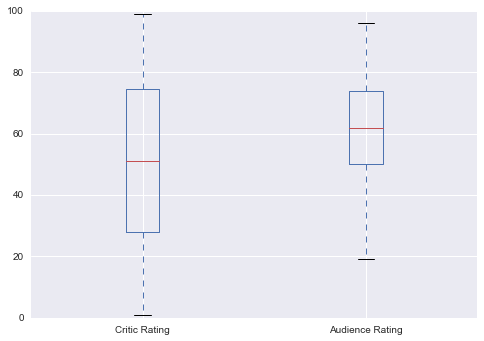

In [12]:
normal_movies[["Critic Rating", "Audience Rating"]].plot(kind="box")

Apparently 'Critic Rating' which are Ratings from professionals are more spread than 'Audience Rating'. 

# Box Plot - Critic Vs Audience Ratings Per Year : How the Scores changed by Year

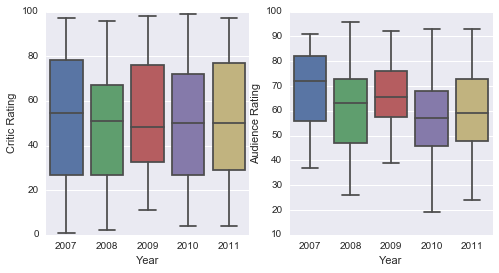

In [28]:
normal_movies = normal_movies.sort_values("Year",axis = 0)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(x="Year", y="Critic Rating", data = normal_movies, ax=ax1)
sns.boxplot(x="Year", y="Audience Rating", data = normal_movies, ax=ax2)

plt.show()

# Box Plots - Profitable Vs Unprofitable Movies

In [34]:
def is_profitable(row):
    if row["Profitability"] <= 1.0:
        return False
    return True
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)
print(normal_movies["Profitable"].value_counts())

True     447
False     69
Name: Profitable, dtype: int64


69 Movies were unprofitable and 447 Profitable.

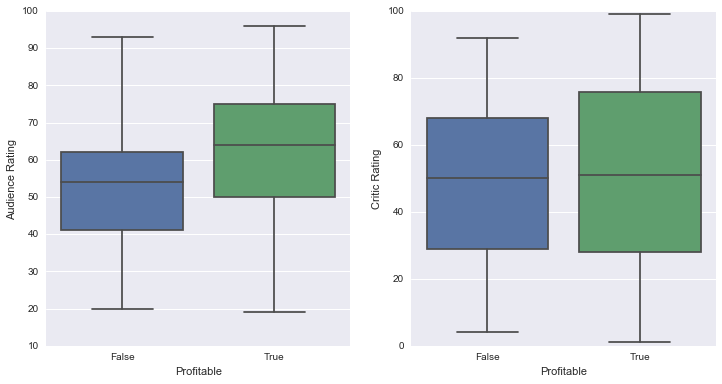

In [44]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(x = "Profitable", y = "Audience Rating", data = normal_movies, ax = ax1)
sns.boxplot(x = "Profitable", y = "Critic Rating", data = normal_movies, ax = ax2)

plt.show()